# Assignment 2

In this assignment you'll explore the relationship between model complexity
and generalization performance, by adjusting key parameters of various
supervised learning models. Part 1 of this assignment will look at regression
and Part 2 will look at classification.

## Part 1 - Regression

First, run the following block to set up the variables needed for later
sections.

<IPython.core.display.Javascript object>


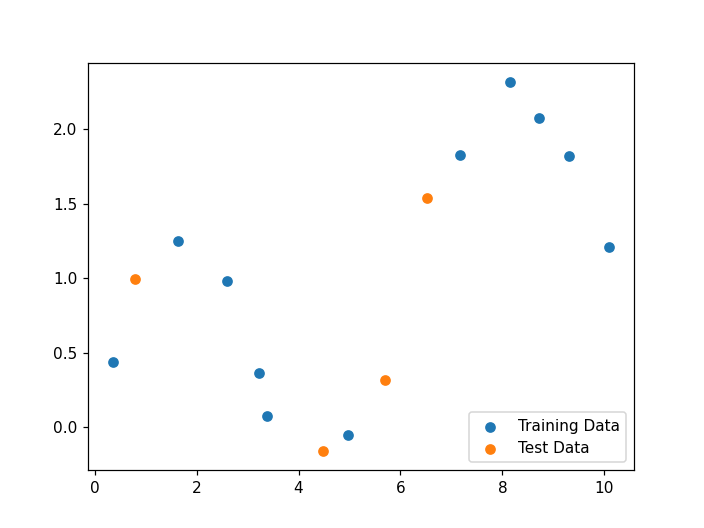

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


%matplotlib notebook
np.random.seed(0)

# Number of data points:
n = 15

# Generate some synthetic data:
X = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(X) + X / 6 + np.random.randn(n) / 10

# Split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


def part1_scatter():
    """Create a scatterplot of the data points in the training and test sets."""
    plt.figure()
    plt.scatter(X_train, y_train, label='Training Data')
    plt.scatter(X_test, y_test, label='Test Data')
    plt.legend(loc=4);


# NOTE: Uncomment the function below to visualize the data, but be sure to
# re-comment it before submitting this assignment to the autograder.
part1_scatter()

### Question 1

Write a function that fits a polynomial `LinearRegression` model on the
*training data* `X_train` for degrees 1, 3, 6, and 9. Use
`PolynomialFeatures` in `sklearn.preprocessing` to create the polynomial
features and then fit a linear regression model. For each model, find 100
predicted values over the interval $x = 0$ to $10$ (e.g., `np.linspace(0, 10, 100)`)
and store this in a numpy array. The first row of this array should
correspond to the output from the model trained on degree 1, the second row
degree 3, the third row degree 6, and the fourth row degree 9.

<img src="polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data
(using `plot_one()`).

*This function should return a numpy array with shape `(4, 100)`.*

In [2]:
def predict_single_degree(degree):
    """Given the degree of the polynomial, compute the predictions."""

    # Reshape the training data X_train.
    # Put the data in the format expected by the fit_transform method of PolynomialFeatures.
    X_train_rsh = X_train.reshape((X_train.size, 1))

    # Generate the polynomial features from X_train_rsh:
    X_train_poly_feats = PolynomialFeatures(degree=degree).fit_transform(X_train_rsh)

    # Create a LinearRegression object, and fit the model using the polynomial features:
    lin_regr = LinearRegression().fit(X_train_poly_feats, y_train)

    # Generate the feature values used for prediction:
    X_pred = np.linspace(0, 10, 100).reshape((100, 1))
    X_pred_poly_feats = PolynomialFeatures(degree=degree).fit_transform(X_pred)

    # Compute the predicted values:
    predictions = lin_regr.predict(X_pred_poly_feats)

    return predictions


def answer_one():

    # List containing the degrees of the polynomials:
    degrees = [1, 3, 6, 9]
    num_degrees = len(degrees)

    # Initialize the array that will store all of the predictions:
    degree_predictions = np.zeros((num_degrees, 100))

    # Loop over the degrees:
    for i in range(num_degrees):
        degree_predictions[i, :] = predict_single_degree(degrees[i])

    return degree_predictions

<IPython.core.display.Javascript object>


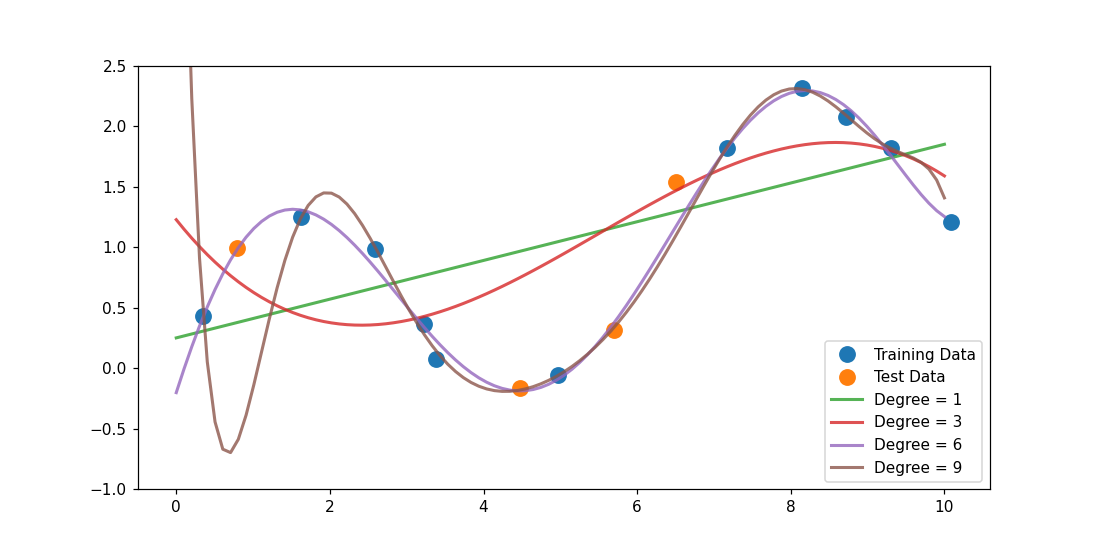

In [3]:
def plot_one(degree_predictions):
    """Use this function to replicate the figure given above."""
    plt.figure(figsize=(10, 5))
    plt.plot(X_train, y_train, 'o', label='Training Data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='Test Data', markersize=10)
    for i, degree in enumerate([1, 3, 6, 9]):
        plt.plot(
            np.linspace(0, 10, 100),
            degree_predictions[i],
            alpha=0.8,
            lw=2,
            label='Degree = {}'.format(degree)
        )
    plt.ylim(-1, 2.5)
    plt.legend(loc=4)


plot_one(answer_one())

### Question 2

Write a function that fits a polynomial LinearRegression model on the
training data `X_train` for degrees 0 through 9. For each model compute the
$R^2$ (coefficient of determination) regression score on the training data as
well as the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`.
Both arrays should have shape `(10,)`.*

In [4]:
def scores_single_degree(degree):
    """Given the degree of the polynomial, compute the R^2 regression score
       for the training and test sets."""

    # Generate the polynomial features for the training data X_train:
    X_train_poly_feats = PolynomialFeatures(degree=degree).fit_transform(X_train.reshape((X_train.size, 1)))

    # Generate the polynomial features for the test data X_test:
    X_test_poly_feats = PolynomialFeatures(degree=degree).fit_transform(X_test.reshape((X_test.size, 1)))

    # Create a LinearRegression object, and fit the model using the polynomial features for the training data:
    lin_regr = LinearRegression().fit(X_train_poly_feats, y_train)

    # Compute the predicted values using the training data:
    y_train_pred = lin_regr.predict(X_train_poly_feats)

    # Compute the predicted values using the test data:
    y_test_pred = lin_regr.predict(X_test_poly_feats)

    # Compute the regression score associated with the training data:
    r2_train = r2_score(y_train, y_train_pred)

    # Compute the regression score associated with the test data:
    r2_test = r2_score(y_test, y_test_pred)

    return (r2_train, r2_test)


def answer_two():

    # List containing the degrees of the polynomials:
    degrees = [degree for degree in range(10)]
    num_degrees = len(degrees)

    # Initialize the arrays that will store the regression scores:
    scores_train = np.zeros(num_degrees)
    scores_test = np.zeros(num_degrees)

    # Loop over the degrees:
    for i in range(num_degrees):
        scores_tuple = scores_single_degree(degrees[i])
        scores_train[i] = scores_tuple[0]
        scores_test[i] = scores_tuple[1]

    return (scores_train, scores_test)


answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247951, -0.64525377]))

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what
degree level corresponds to a model that is underfitting? What degree level
corresponds to a model that is overfitting? What choice of degree level would
provide a model with good generalization performance on this dataset?

Hint: Try plotting the $R^2$ scores from question 2 to visualize the
relationship between degree level and $R^2$. Remember to comment out the
`import matplotlib` line before submission.

*This function should return one tuple with the degree values in this order:
`(Underfitting, Overfitting, Good_Generalization)`. There might be multiple
correct solutions, however, you only need to return one possible solution,
for example, (1, 2, 3).*

<IPython.core.display.Javascript object>


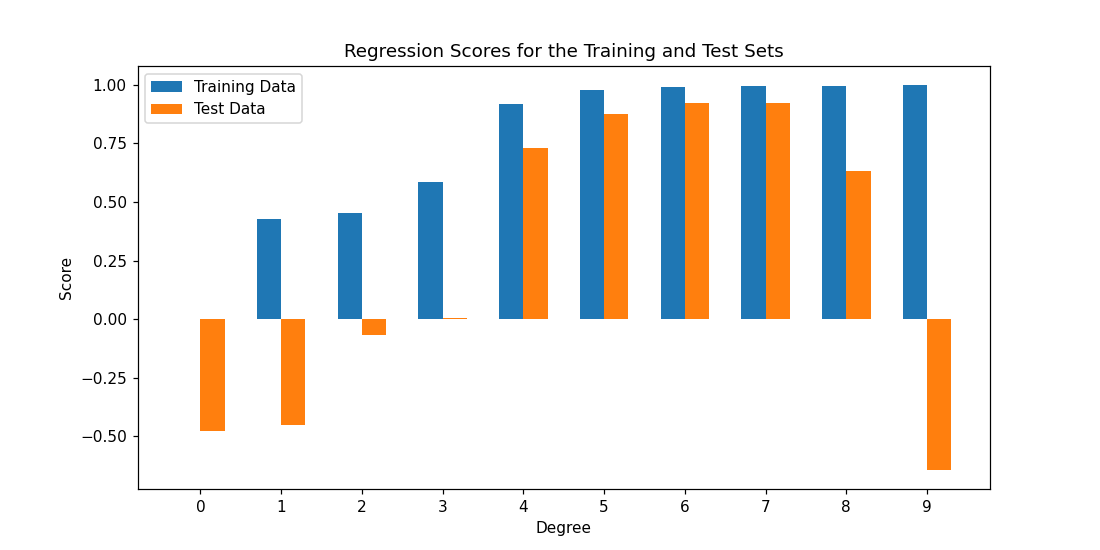

In [5]:
def plot_two():
    """Plot the R^2 regression scores computed by the previous function."""
    scores_train, scores_test = answer_two()
    _, ax = plt.subplots(figsize=(10, 5))
    labels = [str(i) for i in range(10)]
    x = np.arange(len(labels))
    width = 0.3
    ax.bar(x - width / 2, scores_train, width, label='Training Data')
    ax.bar(x + width / 2, scores_test, width, label='Test Data')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Score')
    ax.set_title('Regression Scores for the Training and Test Sets')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()


plot_two()


def answer_three():

    underfitting = 1
    overfitting = 9
    good_generalization = 6

    return (underfitting, overfitting, good_generalization)

### Question 4

Training models on high degree polynomial features can result in overly
complex models that overfit, so we often use regularized versions of the
model to constrain model complexity, as we saw with Ridge and Lasso linear
regression.

For this question, train two models: a non-regularized LinearRegression model
(default parameters) and a regularized Lasso Regression model (with
parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of
degree 12. Return the $R^2$ score for both the LinearRegression and Lasso
model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`.*

In [6]:
def answer_four():

    # Generate the polynomial features for the training data X_train:
    X_train_poly_feats = PolynomialFeatures(degree=12).fit_transform(X_train.reshape((X_train.size, 1)))

    # Generate the polynomial features for the test data X_test:
    X_test_poly_feats = PolynomialFeatures(degree=12).fit_transform(X_test.reshape((X_test.size, 1)))

    # Create a LinearRegression object, and fit the model using the polynomial features for the training data:
    lin_regr = LinearRegression().fit(X_train_poly_feats, y_train)

    # Create a Lasso object, and fit the model using the polynomial features for the training data:
    lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_train_poly_feats, y_train)

    # Using the non-regularized model, compute the predictions for the test data:
    y_test_pred_lin_regr = lin_regr.predict(X_test_poly_feats)

    # Using the regularized model, compute the predictions for the test data:
    y_test_pred_lasso = lasso.predict(X_test_poly_feats)

    # Using the non-regularized model, compute the regression score associated with the test data:
    r2_test_lin_regr = r2_score(y_test, y_test_pred_lin_regr)

    # Using the regularized model, compute the regression score associated with the test data:
    r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

    return (r2_test_lin_regr, r2_test_lasso)


answer_four()

/home/woitek/miniconda3/envs/env1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695890253, tolerance: 0.0006894982540382801
  model = cd_fast.enet_coordinate_descent(


(-4.312001797497546, 0.8406625614750236)

## Part 2 - Classification

Here's an application of machine learning that could save your life! For this
section of the assignment we will be working with the [UCI Mushroom Data
Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored
in `mushrooms.csv`. The data will be used to train a model to predict whether
or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. bruises?: bruises=t, no=f
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
6. gill-attachment: attached=a, descending=d, free=f, notched=n
7. gill-spacing: close=c, crowded=w, distant=d
8. gill-size: broad=b, narrow=n
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. stalk-shape: enlarging=e, tapering=t
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. veil-type: partial=p, universal=u
17. veil-color: brown=n, orange=o, white=w, yellow=y
18. ring-number: none=n, one=o, two=t
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

The data in the mushrooms dataset is currently encoded with strings. These
values will need to be encoded to numeric to work with sklearn. We'll use
pd.get_dummies to convert the categorical variables into indicator variables.

In [7]:
mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:, 2:]
y_mush = mush_df2.iloc[:, 1]

# Use the variables X_train2, y_train2 for Question 5.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons, in Questions 6 and 7, we will create a smaller
# version of the entire mushroom dataset for use in those questions. For
# simplicity we'll just re-use the 25% test split created above as the
# representative subset.

# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

### Question 5

Using `X_train2` and `y_train2` from the preceding cell, train a
DecisionTreeClassifier with default parameters and `random_state=0`. What are
the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the `X_train2.columns`
property, and the order of the features in `X_train2.columns` matches the
order of the feature importance values in the classifier's
`feature_importances_` property.

*This function should return a list of length 5 containing the feature names
in descending order of importance.*

In [8]:
def answer_five():

    # Create a DecisionTreeClassifier object:
    clf = DecisionTreeClassifier(random_state=0)

    # Fit this classifier using the training data X_train2 and y_train2:
    clf.fit(X_train2, y_train2)

    # Get the indexes for putting the feature importances in descending order:
    idx = clf.feature_importances_.argsort()[::-1]

    # Create the list containing the names of the 5 most important features:
    top_5 = list(X_train2.columns.values[idx[:5]])

    return top_5


answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, we're going to use the `validation_curve` function in
`sklearn.model_selection` to determine training and test scores for a Support
Vector Classifier (`SVC`) with varying parameter values. Recall that the
`validation_curve` function, in addition to taking an initialized unfitted
classifier object, takes a dataset as input and does its own internal
train-test splits to compute results.

**Because creating a validation curve requires fitting multiple models, for
performance reasons this question will use just a subset of the original
mushroom dataset: please use the variables `X_subset` and `y_subset` as input
to the validation curve function (instead of `X_mush` and `y_mush`) to reduce
computation time.**

The initialized unfitted classifier object we'll be using is a Support Vector
Classifier with radial basis kernel. So your first step is to create an
`SVC` object with default parameters (i.e., `kernel='rbf', C=1`) and
`random_state=0`. Recall that the kernel width of the RBF kernel is
controlled using the `gamma` parameter.

With this classifier, and the dataset in `X_subset`, `y_subset`, explore the
effect of `gamma` on classifier accuracy by using the `validation_curve`
function to find the training and test scores for 6 values of `gamma` from
`0.0001` to `10` (i.e., `np.logspace(-4, 1, 6)`). Recall that you can specify
what scoring metric you want `validation_curve` to use by setting the
"scoring" parameter. In this case, we want to use "accuracy" as the scoring
metric.

For each level of `gamma`, `validation_curve` will fit 3 models on different
subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level)
arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of `gamma` for
both arrays, creating two arrays of length 6, and return a tuple with the two
arrays.

e.g.,

if one of your arrays of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])

it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return one tuple of numpy arrays `(training_scores, test_scores)`
where each array in the tuple has shape `(6,)`.*

In [9]:
def answer_six():

    # Create an SVC object:
    clf = SVC(kernel='rbf', C=1, random_state=0)

    # Create the array containing the values of the gamma parameter:
    gammas = np.logspace(-4, 1, 6)

    # Compute the training and test scores for the values of gamma specified above:
    train_scores, test_scores = validation_curve(
        estimator=clf,
        X=X_subset,
        y=y_subset,
        param_name='gamma',
        param_range=gammas,
        cv=3,
        scoring='accuracy'
    )

    # For each value of gamma, compute the mean score corresponding to the training data:
    train_means = train_scores.mean(axis=1)

    # For each value of gamma, compute the mean score corresponding to the test data:
    test_means = test_scores.mean(axis=1)

    return (train_means, test_means)


answer_six()

(array([0.56646972, 0.93106844, 0.990645  , 1.        , 1.        ,
        1.        ]),
 array([0.56720827, 0.9300837 , 0.98966027, 1.        , 0.99458395,
        0.52240276]))

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model
that is underfitting (and has the worst test set accuracy)? What gamma value
corresponds to a model that is overfitting (and has the worst test set
accuracy)? What choice of gamma would be the best choice for a model with
good generalization performance on this dataset (high accuracy on both
training and test set)?

Hint: Try plotting the scores from question 6 to visualize the relationship
between gamma and accuracy. Remember to comment out the `import matplotlib`
line before submission.

*This function should return one tuple with the degree values in this order:
`(Underfitting, Overfitting, Good_Generalization)`. Please note there is only
one correct solution.*

<IPython.core.display.Javascript object>


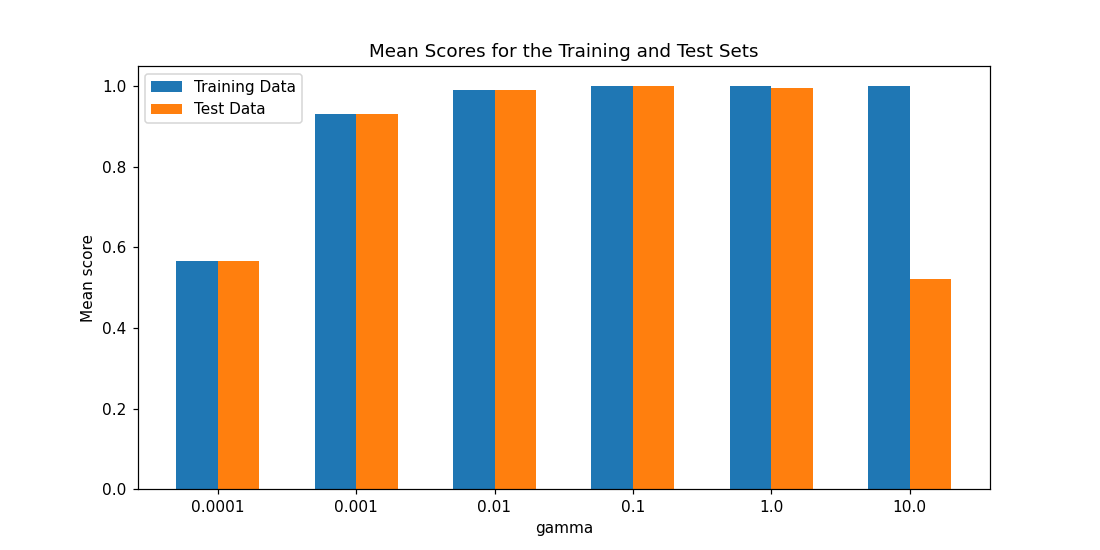

In [10]:
def plot_six():
    """Plot the mean training and test scores computed by the previous function."""
    train_means, test_means = answer_six()
    _, ax = plt.subplots(figsize=(10, 5))
    labels = [str(gamma) for gamma in np.logspace(-4, 1, 6)]
    x = np.arange(len(labels))
    width = 0.3
    ax.bar(x - width / 2, train_means, width, label='Training Data')
    ax.bar(x + width / 2, test_means, width, label='Test Data')
    ax.set_xlabel('gamma')
    ax.set_ylabel('Mean score')
    ax.set_title('Mean Scores for the Training and Test Sets')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()


plot_six()


def answer_seven():

    gammas = np.logspace(-4, 1, 6)
    underfitting = gammas[0]
    overfitting = gammas[5]
    good_generalization = gammas[3]

    return (underfitting, overfitting, good_generalization)